# UTSA CS 3793/5233: Assignment-1

**Manishimwe Retrouvailles - vvk160**






## Learning Objectives


*   Read data from a file and Create a graph
*   Implement Uninformed & Informed searching strategies
*   Apply different searching strategies for the given problem
*   Analyze and Compare the searching strategies


## Description

This assignment is focused on **python file reading, graph creation** and implementation of **search algorithms**. 
In the following sections, you will complete a series of tasks for a made up problem of *Coronavirus in Texas*.

*   Coronavirus is non-discriminatory, in the sense that it can spread from one city to any other city. The only goal of the virus is to spread to all cities in Texas. Find a possible way for the virus to spread (Uninformed Search).
*   To counter the effect of the virus, vaccine needs to be distributed to all cities. One city has more demand than supply, whereas one city has a shortage of vaccines. The goal is to find an **optimal** strategy to transport the vaccine (Informed Search) from the city with high supply (low demand) to the city with low supply (high demand).

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library for the search algorithms. You can get pieces of code from online, but please cite the source properly.


# Reading Data Files & Creating a 2D Graph

## (50 points)

In this section, you will write code to read the data files provided, cities.csv and distances.csv, and create a 2D graph consisting of nodes and edges. The goal is to use this graph for the 2 search agents that you will create in the next section.

Provided with this lab, on Blackboard, you will find 2 csv files:

*   **cities.csv** - This file contains a list of coordinates for selected cities in Texas, in the following format:
```
San Antonio,29.4685,-98.5254
```
The above line means that San Antonio is located at the latitude and longitude of 29.4685 N and 98.5254 W respectively. Note that the '-ve' sign denotes 'S' for latitude and 'W' for longitude. While performing calculations you will need to ignore the sign.

*   **distances.csv** - This file contains distance values between two cities of Texas, if a path exists, in the following format:
```
San Antonio,New Braunfels,30.80876734
```
The above line denotes that there should be an edge between *San Antonio* and *New Braunfels* and the weight on that edge, i.e. the distance, is *30.80876734*.

In the code blocks below, handle the logic for the graph. Load the graph data from the give files and display a 2D graph of the given data, with labeled nodes and edges. Create as many functions or code blocks as needed.

## Extra Credit (4 points)

Overlay the 2D graph on an image of the Texas state map.





In [1]:
# Add only your imports here - following are the ones that may be enough to finish the assignment
import pandas as pd
import matplotlib.pyplot as plt
from queue import PriorityQueue
import geopy.distance

In [ ]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence/Data/"
map = "texas-map.png"

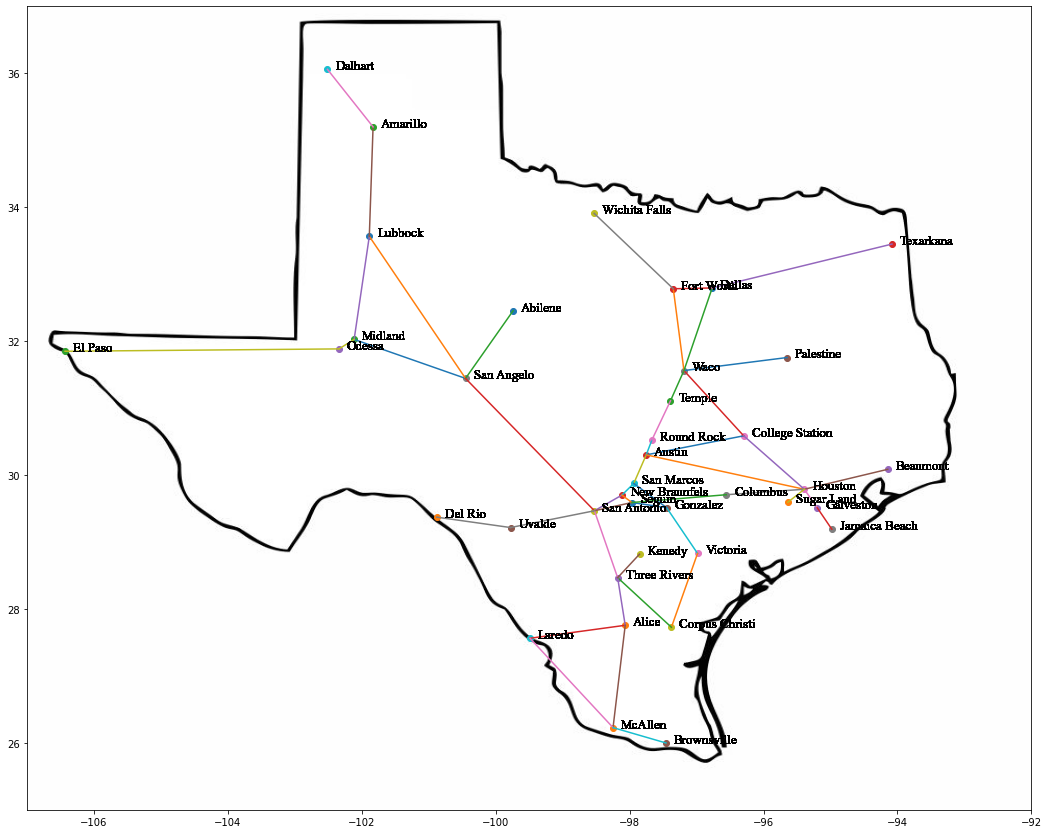

In [3]:
map_im = r'C:\Users\rmani\.vscode\jupyterf\Artificial_Intelligence\assignments\assignment1\texas-map.jpg'
city_column=["City", "Longitude", "Latitude"] #set column names
cities = pd.read_csv(r'C:\Users\rmani\.vscode\jupyterf\Artificial_Intelligence\assignments\assignment1\data\cities.csv',delimiter=',', index_col=None,names=city_column)
cities = cities.reset_index()

distance_column=["Start", "End", "Distance"] #set column names
distance = pd.read_csv(r'C:\Users\rmani\.vscode\jupyterf\Artificial_Intelligence\assignments\assignment1\data\distances.csv',delimiter=',', index_col=None,names=distance_column)
distance = distance.reset_index()

# Display a 2D graph of the given data.
plt.rcParams['figure.figsize'] = [18, 15]
for index, row in cities.iterrows():
    plt.scatter(row['Latitude'],row['Longitude'])
    for i in range(40):
        plt.annotate(row['City'],
                    xy=(row['Latitude'],row['Longitude']),
                    xytext=(8, 0),
                    textcoords='offset points',
                    fontsize=13,
                    fontweight='ultralight',
                    fontname='Times New Roman')
lat1=[]
lat2=[]
lon1=[]
lon2=[]
for index, row in distance.iterrows():
    start=row['Start']
    end=row['End']
    for index, row in cities.iterrows():
        if start == row['City']:
            lat1.append(row['Latitude'])
            lon1.append(row['Longitude'])
        if end == row['City']:
            lat2.append(row['Latitude'])
            lon2.append(row['Longitude'])
plt.plot((lat1,lat2),(lon1,lon2))
plt.xlim([-107,-92])
plt.ylim([25,37])
image=plt.imread(map_im)
plt.imshow(image,extent=[-108.3,-91.5,24,38.5])
plt.show()

# Virus Spread - Uninformed Search Agent

## (50 points)

In this section, you will use the graph created in the previous section and create an *uninformed search* agent that will print the path how the virus will spread to all the provided Texas cities. The first confirmed case of the virus was in **Three Rivers** and starts spreading from there. The virus does not discriminate and it needs to spread to all the cities of Texas.

In the following code block, write code to implement **any** uninformed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path or sequence of cities that will be infected by the spread of Coronavirus.
*   The distance travelled by the selected virus spreading strategy.

## Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

In [ ]:
# Implement ANY uninformed search strategy for the spread of coronavirus from the starting city of 'Three Rivers'
visited=[]
queue=[]
cities_dict={}
city=[]
lat=[]
lon=[]
for index, row in cities.iterrows():
  city.append(row['City'])
  lat.append(row['Latitude'])
  lon.append(row['Longitude'])
coord=(zip(lat,lon))
cities_dict=dict(zip(city,coord))
first_key=next(iter(cities_dict))


In [295]:
from collections import defaultdict
end=[]
start=[]
graph=defaultdict(list)
for index, row in distance.iterrows():
  start.append(row['Start'])
  end.append(row['End'])
for s,e in zip(start,end):
  graph[s].append(e)
print(graph)

defaultdict(<class 'list'>, {'San Angelo': ['Midland', 'Lubbock', 'Abilene', 'San Antonio'], 'San Antonio': ['New Braunfels', 'Seguin', 'Three Rivers', 'Uvalde'], 'Austin': ['San Marcos', 'Round Rock', 'College Station', 'Houston'], 'Temple': ['Waco'], 'College Station': ['Waco', 'Houston'], 'Houston': ['Beaumont', 'Galveston', 'Columbus', 'Sugar Land'], 'Victoria': ['Gonzalez'], 'Gonzalez': ['Seguin'], 'Corpus Christi': ['Victoria', 'Three Rivers'], 'Alice': ['Laredo', 'Three Rivers', 'McAllen'], 'Laredo': ['McAllen'], 'Del Rio': ['Uvalde'], 'El Paso': ['Odessa'], 'McAllen': ['Brownsville'], 'Waco': ['Palestine', 'Fort Worth', 'Dallas'], 'Dallas': ['Fort Worth'], 'Lubbock': ['Midland', 'Amarillo'], 'Amarillo': ['Dalhart'], 'Fort Worth': ['Wichita Falls'], 'Midland': ['Odessa'], 'San Marcos': ['New Braunfels', 'Gonzalez'], 'New Braunfels': ['Seguin'], 'Columbus': ['Seguin'], 'Galveston': ['Jamaica Beach'], 'Texarkana': ['Dallas'], 'Three Rivers': ['Kenedy'], 'Round Rock': ['Temple']})


In [ ]:
adj_list = {}
mylist = []
def add_node(node):
  if node not in mylist:
    mylist.append(node)
  else:
    print("Node ",node," already exists!")
 
def add_edge(node1, node2):
  temp = []
  if node1 in mylist and node2 in mylist:
    if node1 not in adj_list:
      temp.append(node2)
      adj_list[node1] = temp
   
    elif node1 in adj_list:
      temp.extend(adj_list[node1])
      temp.append(node2)
      adj_list[node1] = temp
       
  else:
    print("Nodes don't exist!")
 
def graph():
  for node in adj_list:
    print(node, " ---> ", [i for i in adj_list[node]])
#Adding nodes
add_node(0)
add_node(1)
add_node(2)
add_node(3)
add_node(4)
#Adding edges
add_edge(0,1)
add_edge(1,2)
add_edge(2,3)
add_edge(3,0)
add_edge(3,4)
add_edge(4,0)
 
#Printing the graph

#Printing the adjacency list
print(adj_list)


In [ ]:

visited=[]
queue=[]
def bfs(visited,graph, node): #function for BFS
  queue.append(node)
  visited.append(node)

  while queue:          # Creating loop to visit each node
    node = queue.pop(0) 
    print(node)
    if node not in visited:
      # add node to list of checked nodes
      visited.append(node)
      neighbours = graph[node]
 
      # add neighbours of node to queue
      for neighbour in neighbours:
        queue.append(neighbour)
  return node
bfs(visited,graph, 0)

In [ ]:
graph={'San Angelo': ['Midland', 'Lubbock', 'Abilene', 'San Antonio'], 'San Antonio': ['New Braunfels', 'Seguin', 'Three Rivers', 'Uvalde'], 'Austin': ['San Marcos', 'Round Rock', 'College Station', 'Houston'], 'Temple': ['Waco'], 'College Station': ['Waco', 'Houston'], 'Houston': ['Beaumont', 'Galveston', 'Columbus', 'Sugar Land'], 'Victoria': ['Gonzalez'], 'Gonzalez': ['Seguin'], 'Corpus Christi': ['Victoria', 'Three Rivers'], 'Alice': ['Laredo', 'Three Rivers', 'McAllen'], 'Laredo': ['McAllen'], 'Del Rio': ['Uvalde'], 'El Paso': ['Odessa'], 'McAllen': ['Brownsville'], 'Waco': ['Palestine', 'Fort Worth', 'Dallas'], 'Dallas': ['Fort Worth'], 'Lubbock': ['Midland', 'Amarillo'], 'Amarillo': ['Dalhart'], 'Fort Worth': ['Wichita Falls'], 'Midland': ['Odessa'], 'San Marcos': ['New Braunfels', 'Gonzalez'], 'New Braunfels': ['Seguin'], 'Columbus': ['Seguin'], 'Galveston': ['Jamaica Beach'], 'Texarkana': ['Dallas'], 'Three Rivers': ['Kenedy'], 'Round Rock': ['Temple']}
visited=[]
queue=[]
def bfs(visited,graph, node): #function for BFS
  queue.append(node)
  visited.append(node)

  while queue:          # Creating loop to visit each node
    node = queue.pop(0) 
    print(node)
    if node not in visited:
      # add node to list of checked nodes
      visited.append(node)
      neighbours = graph[node]
 
      # add neighbours of node to queue
      for neighbour in neighbours:
        queue.append(neighbour)
        return visited
bfs(visited,graph, 'Three Rivers')


In [ ]:
graph={'San Angelo': ['Midland', 'Lubbock', 'Abilene', 'San Antonio'], 'San Antonio': ['New Braunfels', 'Seguin', 'Three Rivers', 'Uvalde'], 'Austin': ['San Marcos', 'Round Rock', 'College Station', 'Houston'], 'Temple': ['Waco'], 'College Station': ['Waco', 'Houston'], 'Houston': ['Beaumont', 'Galveston', 'Columbus', 'Sugar Land'], 'Victoria': ['Gonzalez'], 'Gonzalez': ['Seguin'], 'Corpus Christi': ['Victoria', 'Three Rivers'], 'Alice': ['Laredo', 'Three Rivers', 'McAllen'], 'Laredo': ['McAllen'], 'Del Rio': ['Uvalde'], 'El Paso': ['Odessa'], 'McAllen': ['Brownsville'], 'Waco': ['Palestine', 'Fort Worth', 'Dallas'], 'Dallas': ['Fort Worth'], 'Lubbock': ['Midland', 'Amarillo'], 'Amarillo': ['Dalhart'], 'Fort Worth': ['Wichita Falls'], 'Midland': ['Odessa'], 'San Marcos': ['New Braunfels', 'Gonzalez'], 'New Braunfels': ['Seguin'], 'Columbus': ['Seguin'], 'Galveston': ['Jamaica Beach'], 'Texarkana': ['Dallas'], 'Three Rivers': ['Kenedy'], 'Round Rock': ['Temple']}
from collections import deque
def BFS(graph, v, discovered):
 
    # create a queue for doing BFS
    q = deque()
 
    # mark the source vertex as discovered
    discovered[v] = True
 
    # enqueue source vertex
    q.append(v)
 
    # loop till queue is empty
    while q:
 
        # dequeue front node and print it
        v = q.popleft()
        print(v, end=' ')
 
        # do for every edge (v, u)
        for u in graph.adjList[v]:
            if not discovered[u]:
                # mark it as discovered and enqueue it
                discovered[u] = True
                q.append(u)
n=47
discovered = [False] * n
for i in range(n):
        if not discovered[i]:
            # start BFS traversal from vertex i
            BFS(graph, i, discovered)

In [ ]:
#iterating through the cities file for all three rows
city=[]
lat=[]
lon=[]
for index, row in cities.iterrows():
  city.append(row['City'])
  lat.append(row['Latitude'])
  lon.append(row['Longitude'])
coord=(zip(lat,lon))
cities_dict=dict(zip(city,coord))
print(next(iter(cities_dict)))

# Vaccine Transportation - Informed Search Agent

## (50 points)

In this section, you will create an *informed search* agent that will be used to transport the vaccine. The city of **San Antonio** has more supply of vaccine than the demand. The goal is to create an **optimal strategy** to transport the vaccine and make it available at the highly affected city of **College Station**, where there is a shortage of vaccines.

In the following code block, write code to implement an **optimal** informed search strategy. You are free to create more code blocks if needed. As the output, print 

*   The path / sequence of cities that will be visited in the optimal vaccine transportation strategy.
*   The total distance travelled in the optimal vaccine transportation strategy.


## Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

In [ ]:
# Implement an OPTIMAL informed search strategy for distributing the vaccine from 'San Antonio' to 'College Station'


# Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

## Rubric

*   (50 points) Reading Data files & Creating a 2D Graph
*   (50 points) Virus Spread - Uninformed Search Agent
*   (50 points) Vaccine Transportation - Informed Search Agent
*   (10 points) Extra Credit - on the Texas map image, overlay the 2D graph and the paths selected by the search agents



